In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os 
import sys

In [4]:
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [35]:
import numpy as np
import pandas as pd

In [36]:
from src.dataloading import DataLoader
from src.benchmark import BenchMark

In [37]:
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

In [38]:
benchmark = BenchMark(dataset_exclude=["annthyroid", "ecoli", "kdd-http", "kdd-smtp", 
                                       "shuttle", "forest-cover", "mammography", "glass", "lympho"])

--> reading json with dataset attributes
Dataset name: vowels
--> reading json with dataset attributes
--> ../data directory present
--> data is present
--> data loaded, shape: (1456, 13)
Dataset name: thyroid
--> reading json with dataset attributes
--> ../data directory present
--> data is present
--> data loaded, shape: (3772, 7)


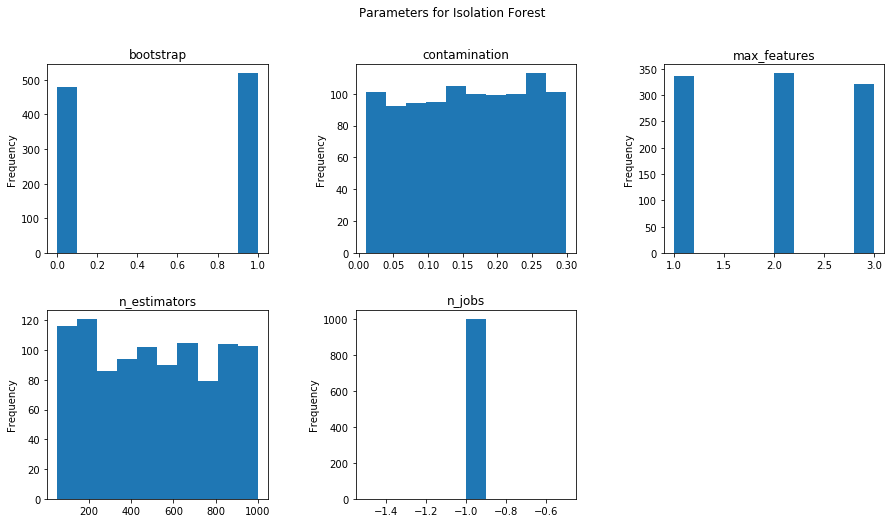

In [46]:
# Isolation forest
benchmark.add_model("Isolation Forest", IForest) \
    .add_param("contamination", lambda: round(np.random.uniform(0.01, 0.3), ndigits=3)) \
    .add_param("n_estimators", lambda: np.random.randint(50, 1000)) \
    .add_param("max_features", lambda: np.random.randint(1, 4)) \
    .add_param("bootstrap", lambda: int(np.random.choice([0, 1]))) \
    .add_param("n_jobs", lambda: -1) \
    .plot_params()

In [44]:
# uCBLOF
benchmark.add_model("uCBLOF", CBLOF) \
    .add_param("n_clusters", lambda: np.random.randint(3, 50))